In [1]:
.libPaths()
library(tidyverse)
library(Seurat)
library(patchwork)

theme_set( theme_bw() )

root.dir <- here::here( "./" )
data.dir <- "../GEO/GSE167422/"

"%ni%" <- Negate("%in%")

sessionInfo()

[1] "/home/cl266/R_4.2.1"                     
[2] "/n/app/R/4.2.1-gcc-9.2.0/lib64/R/library"

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Attaching SeuratObject



R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /n/app/openblas/0.3.19-gcc-9.2.0/lib/libopenblas_haswellp-r0.3.19.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] patchwork_1.1.2    SeuratObject_4.1.3 Seurat_4.3.0       lubridate_1.9.2   
 [5] forcats_1.0.0      stringr_1.5.0      dplyr_1.1.1        purrr_1.0.1       
 [9] readr_2.1.4        tidyr_1.3.0        tibble_3.2.1       ggplot2_3.4.2     
[13] tidyverse_2.0.0   

loaded via a namespace (and not

# Objectives & Background

This is to reproduce the Figure S4. Figure 4 reproduction are found in `20231001_python_Figure3_4.ipynb`.

In [2]:
# Consistent colour scheme for Figure 3 and Figure 4
viridis.color <- viridisLite::viridis(n=6, alpha = 0.7, begin = 0, end = 0.9, direction = 1, option = "C")

cluster.color <- c(
    "3" = viridis.color[1],
    "6" = viridis.color[2],
    "1" = viridis.color[3],
    "2" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[3],
    "5" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[4],
    "4" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[2]
)

figure5a_theme <-
theme(
  axis.ticks   = element_blank(),
  axis.text    = element_blank(),
  panel.grid   = element_blank(),
  panel.border = element_blank(),
  axis.line    = element_line(),
  legend.title = element_blank(),
  legend.position = "none"
)

# UMAP axis has no meaning at all, but according to the current convention
axis.data <-
  tibble(
    x    = c(-12, -12, -7),
    y    = c(-5, -10, -10)
  )

# Figure S4


In [3]:
tictoc::tic()
integrated <- readRDS( paste0( data.dir, "20230509_4F_integrated.rds" ) ) # This is 3F dataset, but using the reference based annotation
tictoc::toc()

143.681 sec elapsed


In [4]:
integrated$label.0.2 <- with(
    integrated@meta.data,
    case_when(
        integrated_snn_res.0.2 == 1 ~ "rLPC/LPC\nLimb Culture (3D)",
        integrated_snn_res.0.2 == 3 ~ "LPC",
        integrated_snn_res.0.2 == 4 ~ "NonLF\nStandard Culture (2D)",
        integrated_snn_res.0.2 == 5 ~ "NonLF\nLimb Culture (2D)",
        integrated_snn_res.0.2 == 6 ~ "NonLF\nLimb Culture (3D) - 1",
        integrated_snn_res.0.2 == 2 ~ "NonLF\nLimb Culture (3D) - 2"
    )
)

cluster.order <- c(4,5,6,2,1,3)
integrated$cluster.order.0.2 <- factor( integrated$integrated_snn_res.0.2, levels = cluster.order )

cluster.color <- c(
    "4" = viridis.color[1],
    "5" = viridis.color[2],
    "6" = viridis.color[3],
    "2" = viridis.color[4],
    "1" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[3],
    "3" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[4]
)

## Figure S4B

In [5]:
color.mapping.res.0.2 <-
integrated@meta.data %>%
dplyr::count( cluster.order.0.2, label.0.2 ) %>%
dplyr::select( cluster.order.0.2, label.0.2 ) %>%
deframe()

integrated$label.0.2 <- factor(
    integrated$label.0.2,
    levels = color.mapping.res.0.2
)

integrated$label.0.2 %>% unique()
integrated$cluster.order.0.2 %>% unique()

color.mapping.res.0.2

cluster.color.label <- cluster.color
names(cluster.color.label) <- color.mapping.res.0.2[names(cluster.color)]
cluster.color.label


[1] NonLF\nLimb Culture (3D) - 2 rLPC/LPC\nLimb Culture (3D) 
[3] NonLF\nStandard Culture (2D) NonLF\nLimb Culture (3D) - 1
[5] NonLF\nLimb Culture (2D)     LPC                         
6 Levels: NonLF\nStandard Culture (2D) ... LPC

[1] 2 1 4 6 5 3
Levels: 4 5 6 2 1 3

4                              5 
"NonLF\nStandard Culture (2D)"     "NonLF\nLimb Culture (2D)" 
                             6                              2 
"NonLF\nLimb Culture (3D) - 1" "NonLF\nLimb Culture (3D) - 2" 
                             1                              3 
 "rLPC/LPC\nLimb Culture (3D)"                          "LPC"

NonLF\nStandard Culture (2D)     NonLF\nLimb Culture (2D) 
                 "#0D0887B3"                  "#6300A7B3" 
NonLF\nLimb Culture (3D) - 1 NonLF\nLimb Culture (3D) - 2 
                 "#A51F99B3"                  "#D5536FB3" 
 rLPC/LPC\nLimb Culture (3D)                          LPC 
                 "#35B779B3"                  "#BBDF27B3"

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


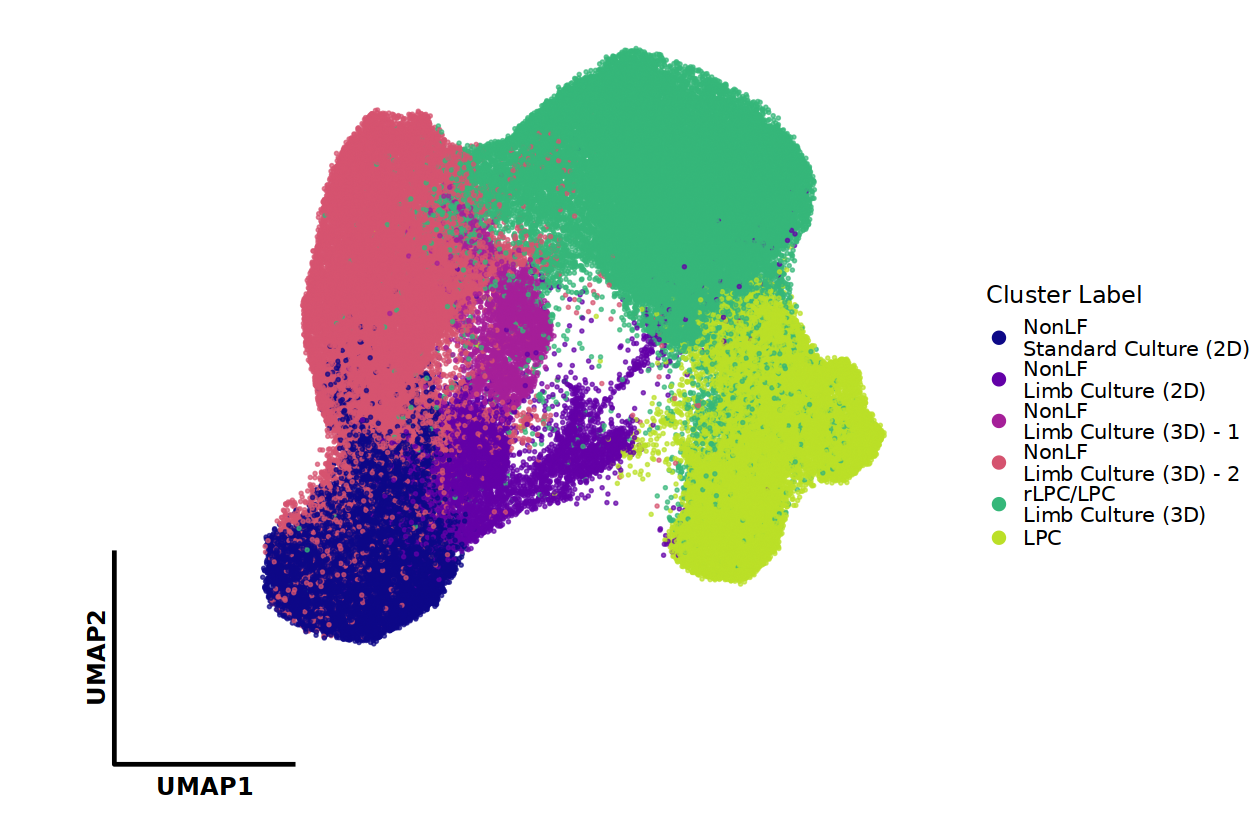

In [6]:
# reorder for visualization

p1 <-
ggplot() +
  geom_point( 
    data=FetchData( integrated, vars = c("UMAP_1", "UMAP_2", "cluster.order.0.2", "label.0.2"  ) )  %>%
            arrange(
                sample(1:n())
#               factor(
#                 cluster.order.0.2,
#                 levels = (cluster.order)
#               )
            ),
#    aes(x = UMAP_1, y = UMAP_2, colour = cluster.order.0.2),
    aes(x = UMAP_1, y = UMAP_2, colour = label.0.2),  # Upon reviewer's request
    size = 0.5
  ) +
  cowplot::theme_cowplot() +
# Upon reviewer's request
#   ggrepel::geom_label_repel(
#     data=FetchData(
#             integrated,
#             vars = c("UMAP_1", "UMAP_2", "label.0.2" )
#         ) %>%
#         group_by( label.0.2 ) %>%
#         summarize(
#             across(
#                 UMAP_1:UMAP_2,
#                 ~mean(.x)
#             )
#         ),
#     aes( 
#       x = UMAP_1, 
#       y = UMAP_2, 
#       label = label.0.2
#     ),
#     size = 7.5,
#     fontface = "bold",
#     alpha = 0.8
#   ) +
  scale_x_reverse( expand = expansion(0.1, 0)) +
# UMAP axis plot
  geom_line(
    data = axis.data,
    inherit.aes = F,
    aes( x = -x, y = y ),
    size = 1
  ) +
  annotate(
    "text", 
    x = 9.5, 
    y = -10.5, 
    label = "UMAP1", 
    hjust = 0.5, # center justified
    vjust = 0.5, # center justified
    fontface = "bold",
    size = 5
  ) +
  annotate(
    "text", 
    x = 12.5,
    y = -7.5,
    label = "UMAP2", 
    vjust = 0.5, # center justified
    hjust = 0.5, # center justified
    angle = 90,
    fontface = "bold",
    size = 5
  ) +
#  scale_colour_viridis_d( option = "C", end = 0.9 ) +
#   scale_colour_manual( 
#     values= cluster.color
#   ) +  
  scale_colour_manual(
      name = "Cluster Label",
#      values = cluster.color
      values = cluster.color.label # Upon reviewer's request
#           c(
# #           cluster.order   # Somehow scale_colour_manual does not work with a variable!
#             "3" = viridis.color[1],
#             "6" = viridis.color[2],
#             "1" = viridis.color[3],
#             "2" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[3],
#             "5" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[4],
#             "4" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[2]
#           )
  ) +
  guides( colour = guide_legend(override.aes = list(alpha = 1, size = 3))) +
#   scale_fill_manual( 
#     values= cluster.color
#   ) +  
  theme( 
# Upon reviewer's request
#    legend.position = "none",  
    axis.ticks   = element_blank(),
    axis.title   = element_blank(),
    axis.text    = element_blank(),
    axis.line    = element_blank(),
    panel.grid   = element_blank(),
    panel.border = element_blank()
  )

options(repr.plot.width=10.5, repr.plot.height=7)
p1


In [7]:
# ggsave( "./figures/FigureS4B.png", plot = p1, width = 10.5, height = 7 )

## Figure S4C

In [8]:
color.mapping.res.0.2

cluster.mapping.res.0.2 <- purrr::map_chr( color.mapping.res.0.2, ~gsub("\n", " ", .x))

cluster.mapping.res.0.2

4                              5 
"NonLF\nStandard Culture (2D)"     "NonLF\nLimb Culture (2D)" 
                             6                              2 
"NonLF\nLimb Culture (3D) - 1" "NonLF\nLimb Culture (3D) - 2" 
                             1                              3 
 "rLPC/LPC\nLimb Culture (3D)"                          "LPC"

4                             5 
"NonLF Standard Culture (2D)"     "NonLF Limb Culture (2D)" 
                            6                             2 
"NonLF Limb Culture (3D) - 1" "NonLF Limb Culture (3D) - 2" 
                            1                             3 
 "rLPC/LPC Limb Culture (3D)"                         "LPC"

In [9]:
DefaultAssay( integrated ) <- "RNA"

df <-
FetchData( 
    integrated, 
    vars = c(
        "integrated_snn_res.0.2",
        "free.annotation2",
        "pseudobulk",
        "condition3",
        "day3",
        "label.0.2"
    )
) %>% dplyr::filter( condition3 %in% c("Primary", "cLPC", "3F", "0F", "4F") ) %>%
mutate(
    # condition3 is too broad term for primaries
    condition4 = case_when(
        condition3 == "Primary" & grepl("Limb", free.annotation2 ) ~ "E9.0",
        condition3 == "Primary" & grepl("E9", free.annotation2 ) ~ "E9.5",
        condition3 == "Primary" & grepl("E10\\.5", free.annotation2 ) ~ "E10-E10.5",
#        condition3 == "Primary" & grepl("E10", free.annotation2 ) ~ "E10",
        condition3 == "Primary" & grepl("E10", free.annotation2 ) ~ "E10-E10.5",
        condition3 == "cLPC" ~ "cultured LPCs",
        condition3 == "0F" ~ "Empty",
        condition3 == "3F" ~ "3 Factors",
        condition3 == "4F" ~ "4 Factors",
        TRUE ~ condition3
    ),
    condition4 = factor(
        condition4,
        levels = c(
            "Empty",
            "3 Factors",
            "4 Factors",
            "cultured LPCs",
            "E9.0",
            "E9.5",
            "E10-E10.5"
        )
    ),
    day4 = factor( as.integer(day3), levels = c(0, 2, 3, 4, 6, 8, 10, 14) ),
    condition5 = case_when(
        condition3 == "Primary" ~ "cultured LPCs",
        condition3 == "cLPC" ~ "cultured LPCs",
        condition3 == "0F" ~ "Empty",
        condition3 == "3F" ~ "3 Factors",
        condition3 == "4F" ~ "4 Factors",
    ),
    condition5 = factor( 
        condition5,
        levels = c(
            "Empty",
            "3 Factors",
            "4 Factors",
            "cultured LPCs"
        )
    )
) %>%
dplyr::filter( condition4 %ni% c("E9.0") ) %>%
dplyr::count( condition5, condition4, condition3, day4, pseudobulk, label.0.2 ) %>%
group_by( condition5, condition4, day4, pseudobulk ) %>%
mutate(
    fraction = n / sum(n),
    cluster.total = sum(n)
) %>%
dplyr::select( -n ) %>%
pivot_wider( names_from = label.0.2, values_from = `fraction`, values_fill = 0 ) %>%
dplyr::filter( cluster.total > 50 ) 

p <- list()

for (i in 1:6) {
    p[[paste0(cluster.mapping.res.0.2[i], " cluster")]] <-
    df %>%
    ggplot( aes( x = day4, y = !!sym(color.mapping.res.0.2[i]), colour = condition4 ) ) +
    geom_boxplot() +
    ggbeeswarm::geom_beeswarm() +
    scale_y_continuous( label = scales::percent, expand = expansion( add = c(0,0), mult = c(0, 0.01)) ) +
    facet_wrap( condition5 ~ . ) +
    labs(
        title = glue::glue("cluster {cluster.mapping.res.0.2[i]} fraction"),
        x = "days after infection/culture",
        colour = "experimental group"
    ) +
    theme(
        plot.title = element_text( size = 7 ),
        axis.title = element_text( size = 7 ),
        axis.text = element_text( size = 7 ),
        strip.text.x.top  = element_text(angle = 0, size = 7)
    )
}



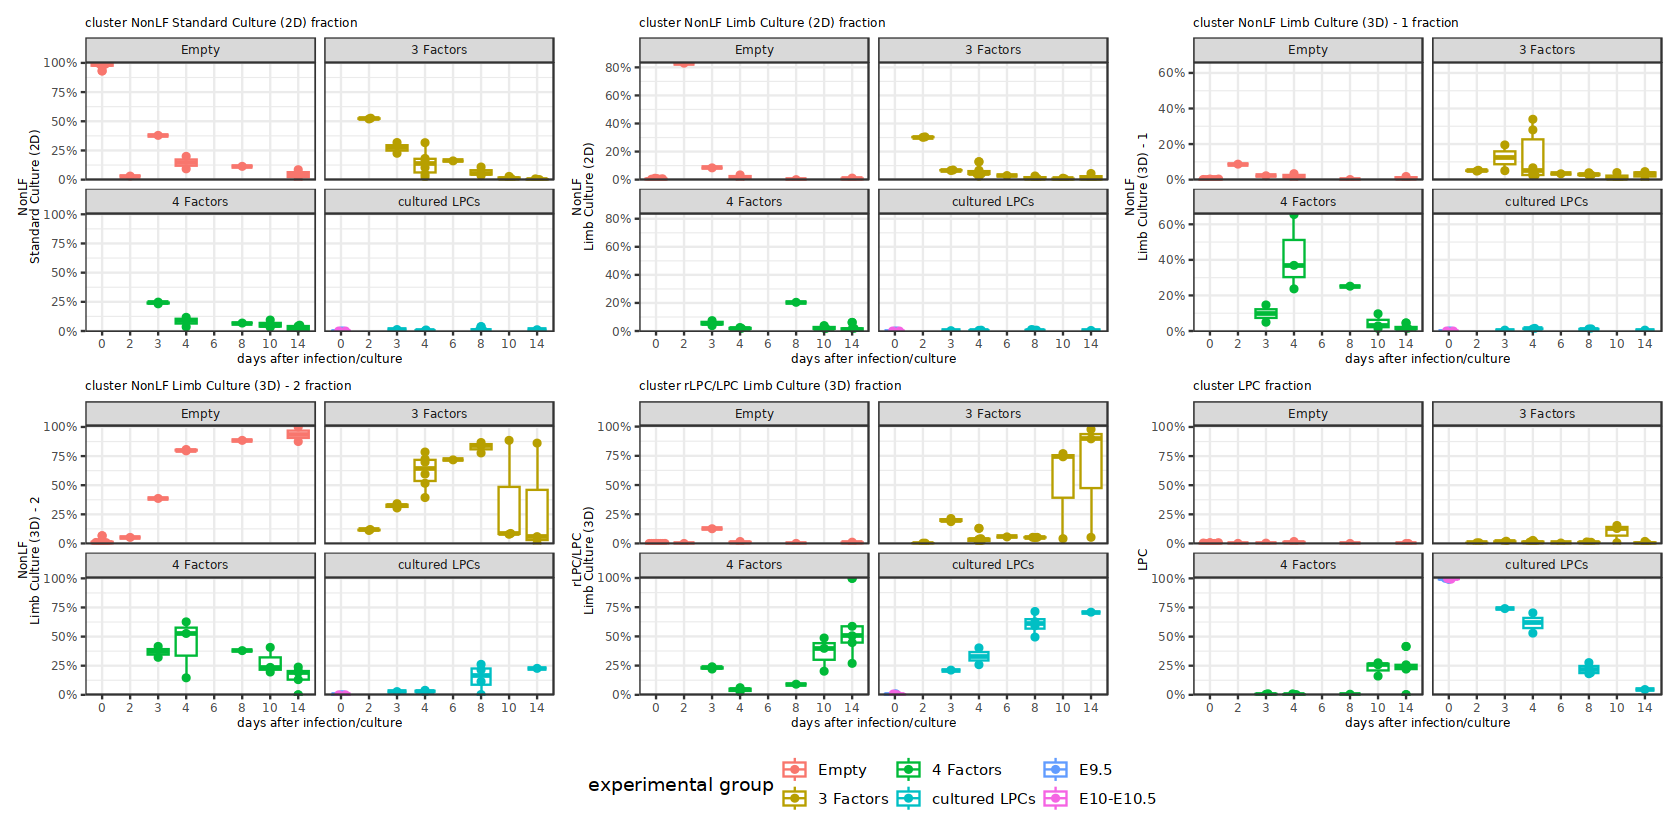

In [10]:
options( repr.plot.width = 21, repr.plot.width = 14 )
FigS4C <- purrr::reduce( p, ~.x + .y ) + plot_layout(guides = "collect") & theme( legend.position = "bottom" )
FigS4C

In [11]:
# ggsave("./figures/FigureS4C.png", plot = FigS4C, width=10.5, height=7)

## Figure S4E

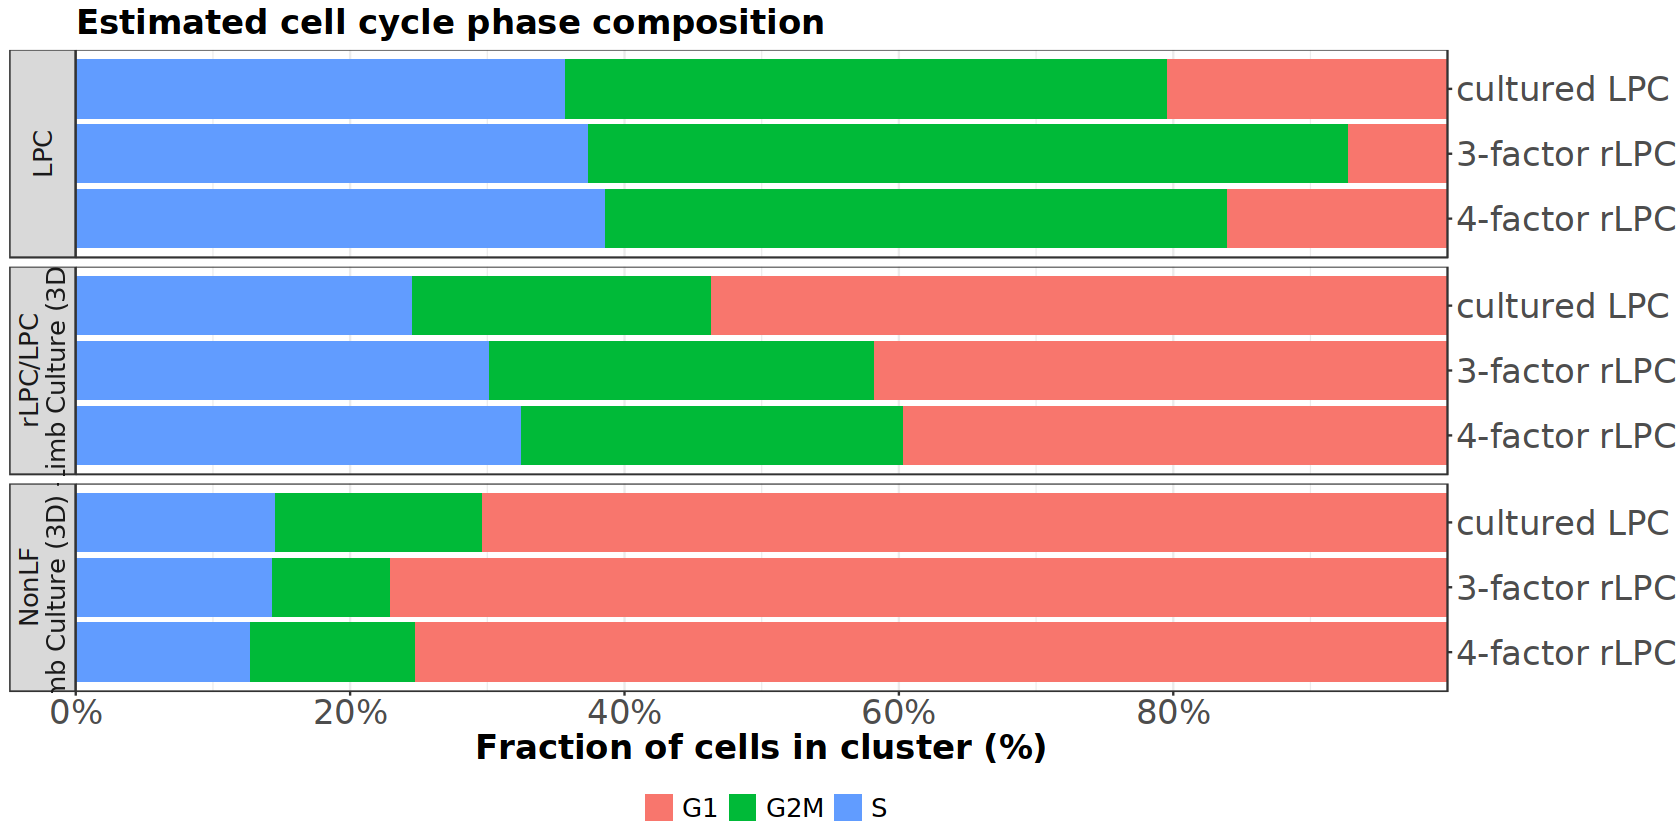

In [12]:
FigS4E <-
FetchData(
    integrated,
    vars = c("label.0.2", "percent.ribo", "S.Score", "G2M.Score", "condition3", "Phase")
) %>%
mutate(
    label.0.2 = factor( 
        label.0.2,
        levels = rev(c(
            "NonLF\nStandard Culture (2D)",
            "NonLF\nLimb Culture (2D)",
            "NonLF\nLimb Culture (3D) - 1",
            "NonLF\nLimb Culture (3D) - 2",
            "rLPC/LPC\nLimb Culture (3D)",
            "LPC"
        ))
    )
) %>%
filter( 
    label.0.2 %in% c(
            "NonLF\nLimb Culture (3D) - 2",
            "rLPC/LPC\nLimb Culture (3D)",
            "LPC"
    )
) %>%
filter( condition3 %in% c("3F", "4F", "cLPC") ) %>%
mutate(
    factors3 = case_when(
        condition3 == "3F"   ~ "3-factor rLPC",
        condition3 == "4F"   ~ "4-factor rLPC",
        condition3 == "cLPC" ~ "cultured LPC"
    ),
    factors3 = factor( 
        factors3, 
        levels = c(
            "4-factor rLPC", 
            "3-factor rLPC",
            "cultured LPC"
        ) 
    )
) %>%
dplyr::count( factors3, label.0.2, Phase ) %>%
group_by( factors3, label.0.2 ) %>%
mutate( fraction = n / sum(n) ) %>%
ggplot( aes( x = factors3, y = fraction, fill = Phase) ) +
geom_col() +
facet_grid( 
   label.0.2 ~ .,
   switch = "both"
) +
scale_x_discrete( position = "top" ) +
scale_y_continuous( 
    name = "Fraction of cells in cluster (%)",
    label = scales::percent,
    expand = c(0,0),
    breaks = c(0, 0.2, 0.4, 0.6, 0.8)
) +
coord_flip() +
ggtitle( "Estimated cell cycle phase composition" ) +
theme( 
    legend.position = "bottom",
    legend.title = element_blank(),
#    legend.title = element_text( size = 20, face = "bold"),
    legend.text  = element_text( size = 15 ),
    strip.text   = element_text( size = 15 ),
    axis.title.y = element_blank(),
    plot.title   = element_text( size = 20, face = "bold" ),
    axis.text.y  = element_text( size = 20, hjust = 1 ),
    axis.title.x = element_text( size = 20, face = "bold" ),
    axis.text.x  = element_text( size = 20 )
)

FigS4E

In [13]:
# ggsave("./figures/FigureS4E.png", plot = FigS4E, width=7, height=7)

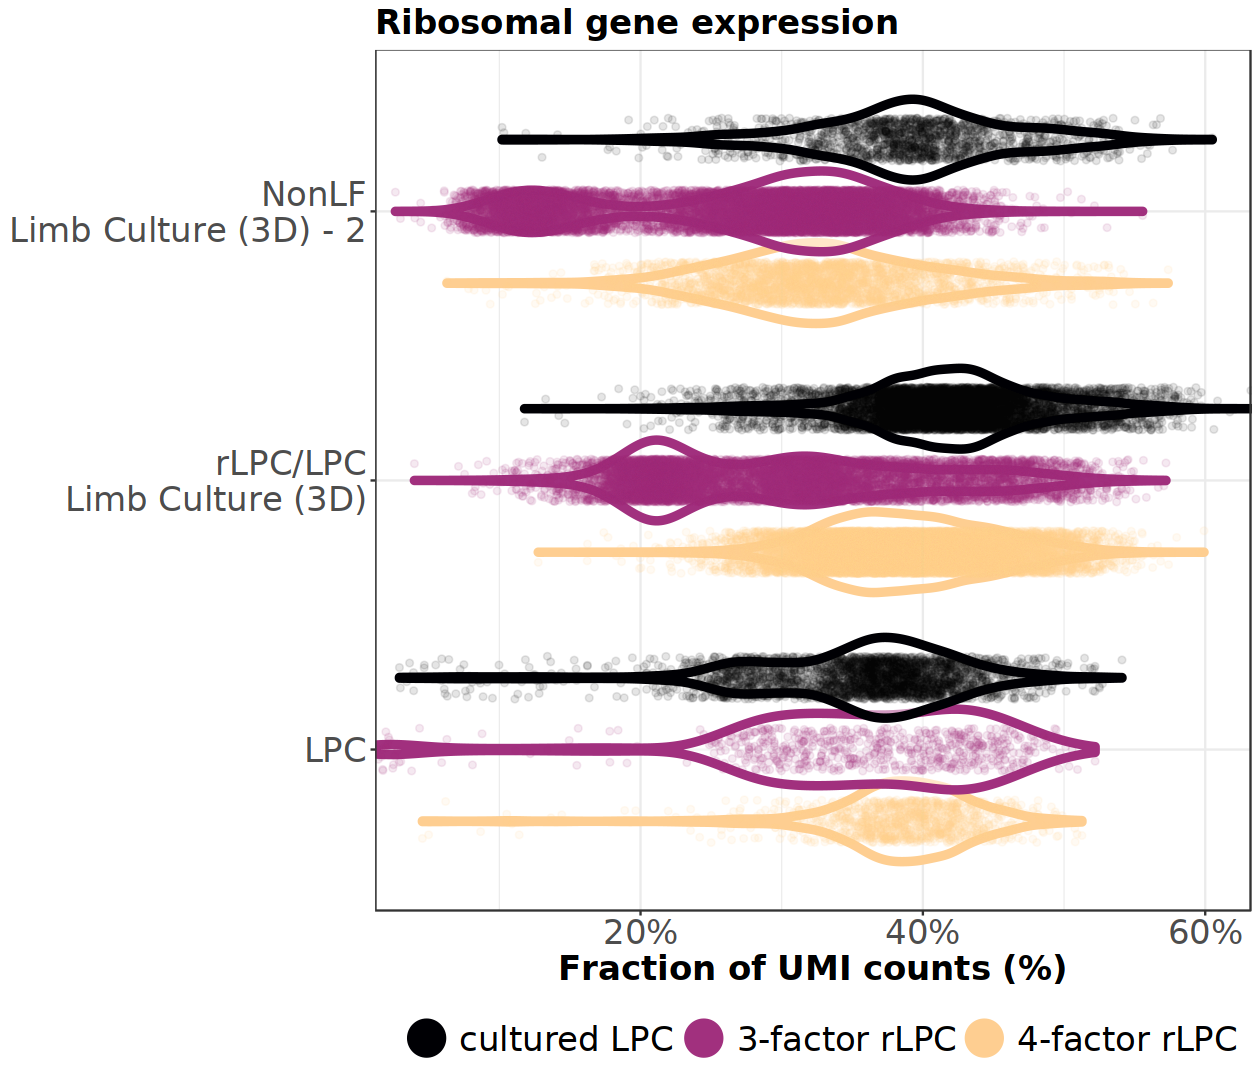

In [14]:
FigS4F <-
FetchData(
    integrated,
    vars = c("label.0.2", "percent.ribo", "S.Score", "G2M.Score", "condition3")
) %>%
mutate(
    label.0.2 = factor( 
        label.0.2,
        levels = rev(c(
            "NonLF\nStandard Culture (2D)",
            "NonLF\nLimb Culture (2D)",
            "NonLF\nLimb Culture (3D) - 1",
            "NonLF\nLimb Culture (3D) - 2",
            "rLPC/LPC\nLimb Culture (3D)",
            "LPC"
        ))
    )
) %>%
filter( 
    label.0.2 %in% c(
            "NonLF\nLimb Culture (3D) - 2",
            "rLPC/LPC\nLimb Culture (3D)",
            "LPC"
    )
) %>%
filter( condition3 %in% c("3F", "4F", "cLPC") ) %>%
mutate(
    factors3 = case_when(
        condition3 == "3F"   ~ "3-factor rLPC",
        condition3 == "4F"   ~ "4-factor rLPC",
        condition3 == "cLPC" ~ "cultured LPC"
    ),
    factors3 = factor( 
        factors3, 
        levels = c(
            "4-factor rLPC", 
            "3-factor rLPC",
            "cultured LPC"
        ) 
    )
) %>%
ggplot( aes( x = label.0.2, y = percent.ribo, colour = factors3) ) +
geom_violin( 
    scale = "width", 
    position = position_dodge(width = 0.8), 
#    aes(fill = factors3),
    size = 2,
    alpha = 0.5
) +
geom_jitter( position = position_jitterdodge(dodge.width=0.8), alpha = 0.1 ) +
scale_y_continuous( 
    name = "Fraction of UMI counts (%)", 
    label = scales::percent,
    expand = c(0,0)
) +
#scale_fill_viridis_d( option = "C", begin = 0.9, end = 0 ) +
# scale_fill_manual(
#   values = c(
# #           cluster.order   # Somehow scale_colour_manual does not work with a variable!
#         "NonLF\nStandard Culture (2D)" = viridis.color[1],
#         "NonLF\nLimb Culture (2D)" = viridis.color[2],
#         "NonLF\nLimb Culture (3D)" = viridis.color[3],
# #            "3" = viridis.color[4],
#         "rLPC/LPC\nLimb Culture (3D)" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[3],
# #            "5" = viridis.color[5],
#         "LPC (E9)" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[4],
# #            "2" = viridis.color[6]
#         "LPC (E10)" = viridisLite::viridis(n=4, alpha = 0.7, begin = 0.2, end = 0.9, direction = 1, option = "D")[2]
#       )
# ) +
scale_colour_viridis_d( 
    option = "A", 
    begin = 0.9, 
    end = 0,
    guide = guide_legend( 
        override.aes = list( 
            size = 10, 
            alpha = 1,
            linetype = 0
        ),
        reverse = T
    )
) +
scale_fill_viridis_d( 
    option = "A", 
    begin = 0.9, 
    end = 0,
    guide = guide_legend( 
        override.aes = list( 
            size = 10, 
            alpha = 1,
            linetype = 0
        ),
        reverse = T
    )
) +
coord_flip() +
ggtitle( "Ribosomal gene expression" ) +
theme( 
    legend.position = "bottom",
    legend.title = element_blank(),
    legend.text  = element_text( size = 20 ),
    axis.title.y = element_blank(),
    plot.title   = element_text( size = 20, face = "bold" ),
    axis.text.y  = element_text( size = 20, hjust = 1 ),
    axis.title.x = element_text( size = 20, face = "bold" ),
    axis.text.x  = element_text( size = 20 )
)

options( repr.plot.width = 10.5, repr.plot.height = 9 )
FigS4F

In [15]:
# ggsave("./figures/FigureS4F.png", plot = FigS4F, width=10.5, height=7)

## Figure S4G

### Figure 4G DEG



In [16]:
integrated@meta.data %>%
dplyr::filter( integrated_snn_res.0.2 == 1 ) %>%
dplyr::count( condition3, day3, batch, pseudobulk ) %>%
group_by( pseudobulk ) %>%
dplyr::filter( n > 100 )

integrated@meta.data %>%
dplyr::filter( integrated_snn_res.0.2 == 1 ) %>%
dplyr::count( condition3, day3, batch, pseudobulk ) %>%
dplyr::filter( n > 100 ) %>%
dplyr::count( condition3 )

# Only take the fully cultured samples

integrated@meta.data %>%
dplyr::filter( integrated_snn_res.0.2 == 1, day3 %in% c("08", "10", "14") ) %>%
dplyr::count( condition3, day3, batch, pseudobulk ) %>%
dplyr::filter( n > 100 ) %>%
dplyr::count( condition3 )

# n=5, n=6.

condition3,day3,batch,pseudobulk,n
<chr>,<chr>,<chr>,<chr>,<int>
3F,03,traj.early,D3-Bar6,196
3F,03,traj.early,D3-Bar7,419
3F,08,traj.late,3FD08-1-bulk,141
3F,10,traj.late,3F-Bar19,984
3F,10,traj.late,3F-Bar20,899
3F,14,10Xcore,rerepr_5-bulk,2856
3F,14,indrop,HA1-bulk,4160
3F,14,indrop,HA2-bulk,213
4F,03,traj.early,D3-Bar8,161


condition3,n
<chr>,<int>
3F,8
4F,8
Primary,1
cLPC,7


condition3,n
<chr>,<int>
3F,6
4F,6
cLPC,5


In [17]:
pseudobulk.list <-
integrated@meta.data %>%
dplyr::filter( integrated_snn_res.0.2 == 1, day3 %in% c("08", "10", "14") ) %>%
dplyr::count( pseudobulk, condition3 ) %>%
group_by( pseudobulk ) %>%
dplyr::filter( n > 100 ) %>%
pull( pseudobulk )

In [18]:
DefaultAssay( integrated ) <- "RNA"

tictoc::tic()
sce <- as.SingleCellExperiment( integrated )

sce_subset <- sce[, 
    sce$integrated_snn_res.0.2 == 1 &
    sce$pseudobulk %in% pseudobulk.list &
    sce$condition3 != "Primary",
]
tictoc::toc()

131.538 sec elapsed


In [19]:
require( glmGamPoi )
tictoc::tic()
sce_reduced <- pseudobulk(
    sce_subset, 
    # This is absolutely confusing way to do things because of our experimental design but in the end makes sense
    group_by = vars(
        batch,
        # library,  # library should not be included because it will split 3F-1/3F-2 and inDrop Pos+Neg
        pseudobulk,
        condition3
    )
)
tictoc::toc()

Loading required package: glmGamPoi


Attaching package: ‘glmGamPoi’


The following object is masked from ‘package:dplyr’:

    vars


The following object is masked from ‘package:ggplot2’:

    vars


Aggregating assay 'counts' using 'rowSums2'.

Aggregating assay 'logcounts' using 'rowMeans2'.



11.198 sec elapsed


In [20]:
tictoc::tic()
fit_batch <- glm_gp(
    sce_reduced, 
#     design = des,
   design = ~ batch + condition3-1,
    reference_level = "10Xcore"
)
tictoc::toc()

61.337 sec elapsed


In [21]:
tictoc::tic()
de_res <- test_de(
    fit_batch, 
    contrast = 
        cond(
            condition3 = "4F"
        ) - 
        cond( 
            condition3 = "cLPC"
        )
    
)
tictoc::toc()

options( repr.plot.width = 10.5, repr.plot.height = 7 )

# Most different genes
de_res %>% 
dplyr::filter( adj_pval < 0.01 )

# ggplot(de_res, aes(x = lfc, y = -log10(pval))) +
#   geom_point(size = 2, aes(color = adj_pval < 0.01)) +
# labs( title = "3F vs. cLPC", subtitle = "in cluster 2, WITH batch correction, include D3, D4")



9.528 sec elapsed


name,pval,adj_pval,f_statistic,df1,df2,lfc
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>


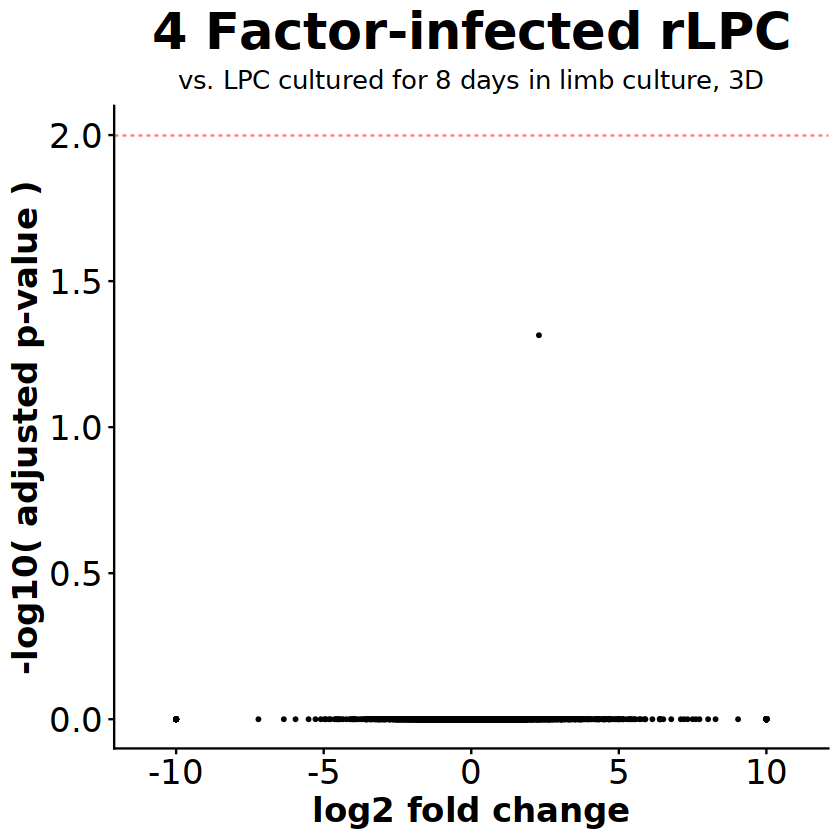

In [22]:
p1 <-
de_res %>%
mutate(
    lfc = ifelse(abs(lfc) > 20, sign(lfc) * Inf, lfc)
) %>% {
    ggplot(., aes(x = lfc, y = -log10(adj_pval))) +
    geom_point(size = 0.6) +
    ggforce::geom_mark_circle(
    data = filter( ., adj_pval < 0.01 ),
    aes( 
      label = name,
      group = name
    ),
    alpha = 1,
    expand = 0.01,
    con.cap = unit(0, "mm"),
    con.type = "elbow",
    con.arrow = arrow( 
      length = unit(1, "mm"),
      ends = "last", 
      type = "closed" 
    ),
    label.buffer = unit(2, 'mm'),
    label.margin = margin(0.5, 0.5, 0.5, 0.5, "mm"),
    label.fontsize = 20,
    label.fontface = "italic",
    label.fill = NA
    ) +
    geom_hline( yintercept = -log10(c(0.01)), colour = "salmon", linetype = "dashed" ) +
    labs(
        title = "4 Factor-infected rLPC",
        subtitle = "vs. LPC cultured for 8 days in limb culture, 3D"
    ) +
    cowplot::theme_cowplot() +
    labs( y = "-log10( adjusted p-value )" ) +
    theme(
        axis.title.y = element_text( size = 20, face = "bold" ) 
    )
}

options( repr.plot.width=7, repr.plot.height=7 )
Figure4G <-
(p1) & 
#scale_y_continuous( lim = c(0,3) ) &
scale_x_continuous( lim = c( -11, 11) ) &
labs( x = "log2 fold change" ) &
theme(
    plot.title    = element_text( size = 30, face = "bold", hjust = 0.5 ),
    plot.subtitle = element_text( size = 15, hjust = 0.5 ),
    axis.title.x  = element_text( size = 20, face = "bold" ),
    axis.text     = element_text( size = 20 )
)

options( repr.plot.width = 7, repr.plot.height = 7 )
Figure4G

In [23]:
# ggsave("figures/Figure4G.png", plot = Figure4G, width = 7, height = 7 )

### Figure 4G inset

Warning message:
“The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in ggplot2 3.3.4.
ℹ Please use "none" instead.”


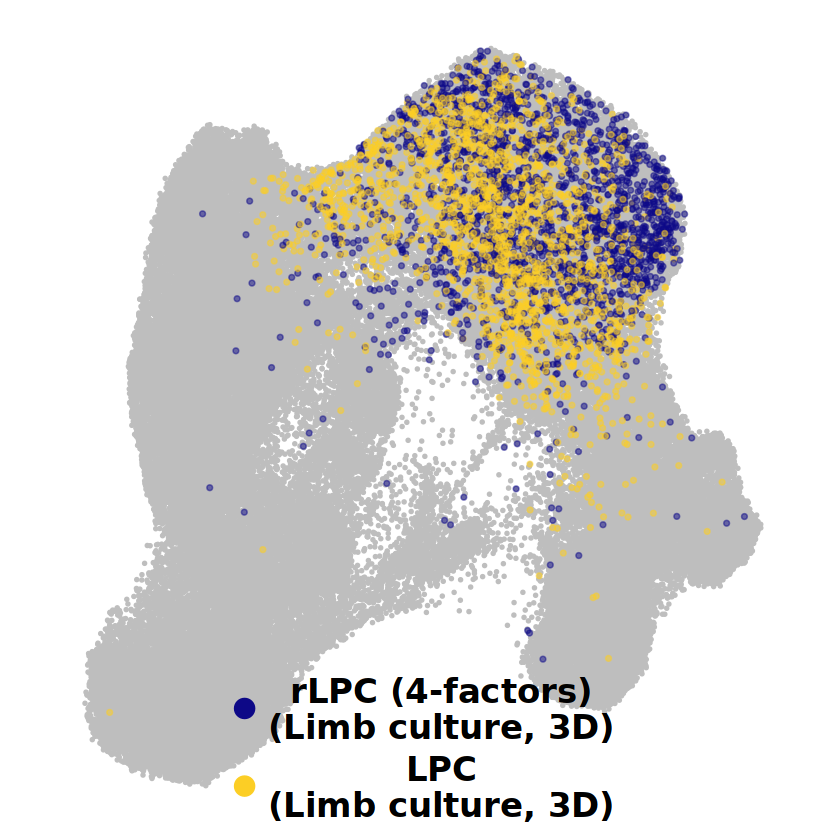

In [24]:
integrated$treatment <- with(
    integrated@meta.data,
    case_when(
        condition3 %in% c("4F")  ~ "rLPC (4-factors)\n(Limb culture, 3D)",
        condition3 %in% c("cLPC") ~ "LPC\n(Limb culture, 3D)",
        TRUE ~ as.character(NA)
    )
)

integrated$treatment <- factor( integrated$treatment, levels = c("rLPC (4-factors)\n(Limb culture, 3D)", "LPC\n(Limb culture, 3D)") )

p1.inset <-
ggplot() +
  geom_point( 
    data=FetchData( integrated, vars = c("UMAP_1", "UMAP_2"  ) ),
    aes(x = UMAP_1, y = UMAP_2),
    size = 0.5,
    colour = "grey"
  ) +
  geom_point( 
    data=FetchData( 
            integrated, 
            vars = c("UMAP_1", "UMAP_2", "treatment", "integrated_snn_res.0.2"  ) 
    ) %>% 
    filter( integrated_snn_res.0.2 == 1, !is.na(treatment) ) %>%
    group_by( treatment ) %>%
    dplyr::arrange( sample(1:n()) ) %>%
    filter( row_number() <= 2000 ),
    aes(x = UMAP_1, y = UMAP_2, colour = treatment),
    size = 1,
    alpha = 0.5
  ) +
# Upon reviewer's request
#   ggrepel::geom_label_repel(
#     data=FetchData(
#             integrated,
#             vars = c("UMAP_1", "UMAP_2", "label.0.2", "integrated_snn_res.0.2" )
#         ) %>%
#         filter( integrated_snn_res.0.2 == 1 ) %>%
#         group_by( label.0.2 ) %>%
#         summarize(
#             across(
#                 UMAP_1:UMAP_2,
#                 ~mean(.x)
#             )
#         ) %>%
#         mutate(
#             label.0.2.reannotated = "rLPC/LPC\nLimb Culture (3D)"
#         )
#       ,
#     aes( 
#       x = UMAP_1, 
#       y = UMAP_2, 
#       label = label.0.2.reannotated
#     ),
#     size = 7.5,
#     fontface = "bold",
#     alpha = 0.8
#   ) +
  cowplot::theme_cowplot() +
  scale_x_reverse( expand = expansion(0.1, 0 ) ) +
#  scale_x_continuous( expand = expansion(0.1, 0)) +
  scale_colour_viridis_d( 
      option = "C", 
      end = 0.9 
  ) +
  scale_fill_manual( 
    guide = FALSE,
    values = c( "white", "gold" )
  ) +  
  guides(
    color = guide_legend(
      override.aes =
        list(
          size=5,
          alpha = 1.0
        ),
      ncol= 1,
      byrow = T
    )
  ) +
  theme( 
    axis.ticks   = element_blank(),
    axis.title   = element_blank(),
    axis.text    = element_blank(),
    panel.grid   = element_blank(),
    panel.border = element_blank(),
    axis.line    = element_blank(),
#    legend.position = "right",
    legend.position = c(0.5, 0.1), 
    legend.justification = c("center", "center"),
#    legend.box.just = "center",
    legend.title = element_blank(),
    legend.text  = element_text( size = 20, face = "bold" ),
    legend.text.align = 0.5
  )


# https://stackoverflow.com/questions/25100038/ggplot2-center-legend-below-plot-instead-of-panel-area
#p2 <- p1.inset + theme( legend.position = "none" ) 
#le1 <- cowplot::get_legend(p1.inset)

options( repr.plot.width=7, repr.plot.height=7 )

p1.inset

#cowplot::plot_grid(p2, le1, nrow = 2, rel_heights = c(1, 0.2))




In [25]:
# ggsave("figures/Figure4G_inset_revised.png", plot = p1.inset, width = 7, height = 7 )